<a href="https://colab.research.google.com/github/acourage369/SONAR-MINE-VS-ROCK-PREDICTION/blob/main/Sonar_Mine_vs_Rock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sonar Mines vs Rock Detection**

## About Dataset
### Context
This is the data set used by Gorman and Sejnowski in their study
of the classification of sonar signals using a neural network [1]. The
task is to train a network to discriminate between sonar signals bounced
off a metal cylinder and those bounced off a roughly cylindrical rock.

### Content
The data set contains the response metrics for 60 separate sonar frequencies sent out against a known mine field (and known rocks). These frequencies are then labeled with the known object they were beaming the sound at (either a rock or a mine).

### Acknowledgements
Copyright by Pierian Data Inc.
For more information, visit us at www.pieriandata.com

In [1]:
#Importing of libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from pandas import pandas as pd
from pandas import set_option
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# **Collection of data and Analysis**

In [2]:
#Printing the first five rows and the last five rows of the sonar dataframe
sonar_data = pd.read_csv('/content/sonar.all-data.csv')
sonar_data

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [3]:
#Checking the shape(number of rows and columns) of our sonar dataframe
sonar_data.shape

(208, 61)

In [4]:
#More infomation (data types) about the sonar dataframe
sonar_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Freq_1   208 non-null    float64
 1   Freq_2   208 non-null    float64
 2   Freq_3   208 non-null    float64
 3   Freq_4   208 non-null    float64
 4   Freq_5   208 non-null    float64
 5   Freq_6   208 non-null    float64
 6   Freq_7   208 non-null    float64
 7   Freq_8   208 non-null    float64
 8   Freq_9   208 non-null    float64
 9   Freq_10  208 non-null    float64
 10  Freq_11  208 non-null    float64
 11  Freq_12  208 non-null    float64
 12  Freq_13  208 non-null    float64
 13  Freq_14  208 non-null    float64
 14  Freq_15  208 non-null    float64
 15  Freq_16  208 non-null    float64
 16  Freq_17  208 non-null    float64
 17  Freq_18  208 non-null    float64
 18  Freq_19  208 non-null    float64
 19  Freq_20  208 non-null    float64
 20  Freq_21  208 non-null    float64
 21  Freq_22  208 non

In [5]:
#Checking for missing or null values in the sonar dataframe
print(sonar_data.isnull().sum())

Freq_1     0
Freq_2     0
Freq_3     0
Freq_4     0
Freq_5     0
          ..
Freq_57    0
Freq_58    0
Freq_59    0
Freq_60    0
Label      0
Length: 61, dtype: int64


In [6]:
#Changing the precision of the values to 3
set_option('display.precision', 3)
#Statiscal description of the sonar dataframe
sonar_data.describe()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_51,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60
count,208.000,2.080e+02,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,...,208.000,2.080e+02,2.080e+02,208.000,2.080e+02,2.080e+02,2.080e+02,2.080e+02,2.080e+02,2.080e+02
mean,0.029,3.844e-02,0.044,0.054,0.075,0.105,0.122,0.135,0.178,0.208,...,0.016,1.342e-02,1.071e-02,0.011,9.290e-03,8.222e-03,7.820e-03,7.949e-03,7.941e-03,6.507e-03
std,0.023,3.296e-02,0.038,0.047,0.056,0.059,0.062,0.085,0.118,0.134,...,0.012,9.634e-03,7.060e-03,0.007,7.088e-03,5.736e-03,5.785e-03,6.470e-03,6.181e-03,5.031e-03
min,0.002,6.000e-04,0.002,0.006,0.007,0.010,0.003,0.005,0.007,0.011,...,0.000,8.000e-04,5.000e-04,0.001,6.000e-04,4.000e-04,3.000e-04,3.000e-04,1.000e-04,6.000e-04
25%,0.013,1.645e-02,0.019,0.024,0.038,0.067,0.081,0.080,0.097,0.111,...,0.008,7.275e-03,5.075e-03,0.005,4.150e-03,4.400e-03,3.700e-03,3.600e-03,3.675e-03,3.100e-03
50%,0.023,3.080e-02,0.034,0.044,0.062,0.092,0.107,0.112,0.152,0.182,...,0.014,1.140e-02,9.550e-03,0.009,7.500e-03,6.850e-03,5.950e-03,5.800e-03,6.400e-03,5.300e-03
75%,0.036,4.795e-02,0.058,0.065,0.100,0.134,0.154,0.170,0.233,0.269,...,0.021,1.673e-02,1.490e-02,0.015,1.210e-02,1.058e-02,1.043e-02,1.035e-02,1.033e-02,8.525e-03
max,0.137,2.339e-01,0.306,0.426,0.401,0.382,0.373,0.459,0.683,0.711,...,0.100,7.090e-02,3.900e-02,0.035,4.470e-02,3.940e-02,3.550e-02,4.400e-02,3.640e-02,4.390e-02


In [7]:
#Distribution of target variable(Labels)
sonar_data.groupby('Label').size()

Label
M    111
R     97
dtype: int64

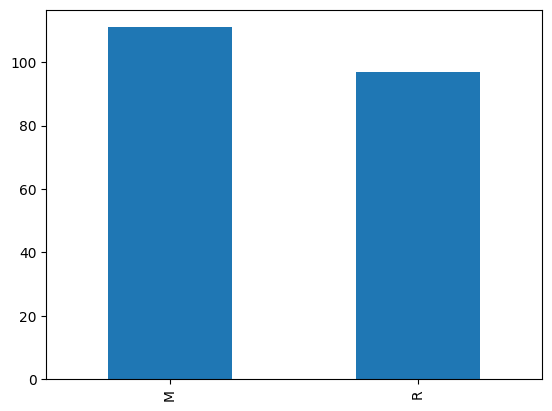

In [8]:
# Visualizing the targeted variables on a bar chart
sonar_data['Label'].value_counts().plot(kind='bar')
plt.show()

### M = Mines
   ### R = Rocks

In [9]:
#Mean of target variables(Labels)
sonar_data.groupby('Label').mean()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_51,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60
Label,,,,,,,,,,,,,,,,,,,,,
M,0.035,0.046,0.051,0.065,0.087,0.112,0.128,0.150,0.213,0.251,...,0.019,0.016,0.012,0.012,0.010,0.009,0.008,0.009,0.009,0.007
R,0.022,0.030,0.036,0.041,0.062,0.096,0.114,0.118,0.137,0.159,...,0.012,0.010,0.010,0.010,0.009,0.007,0.008,0.007,0.007,0.006


# **Data Visualization**

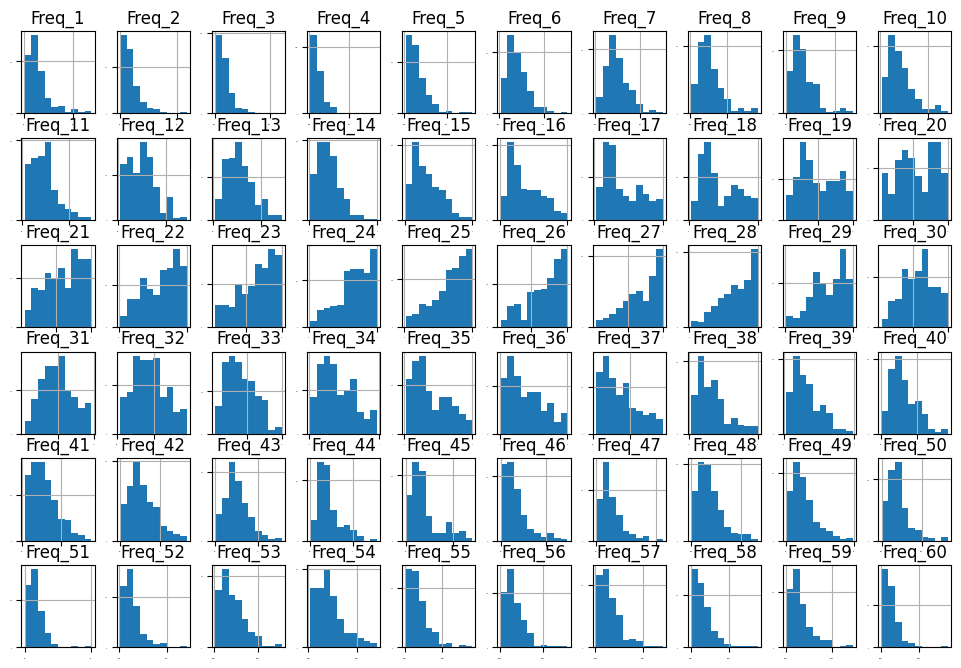

In [10]:
# Visualization of individual attributes using histogram
# Histogram
sonar_data.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, layout=(6, 10), figsize=(12, 8))
pyplot.show()

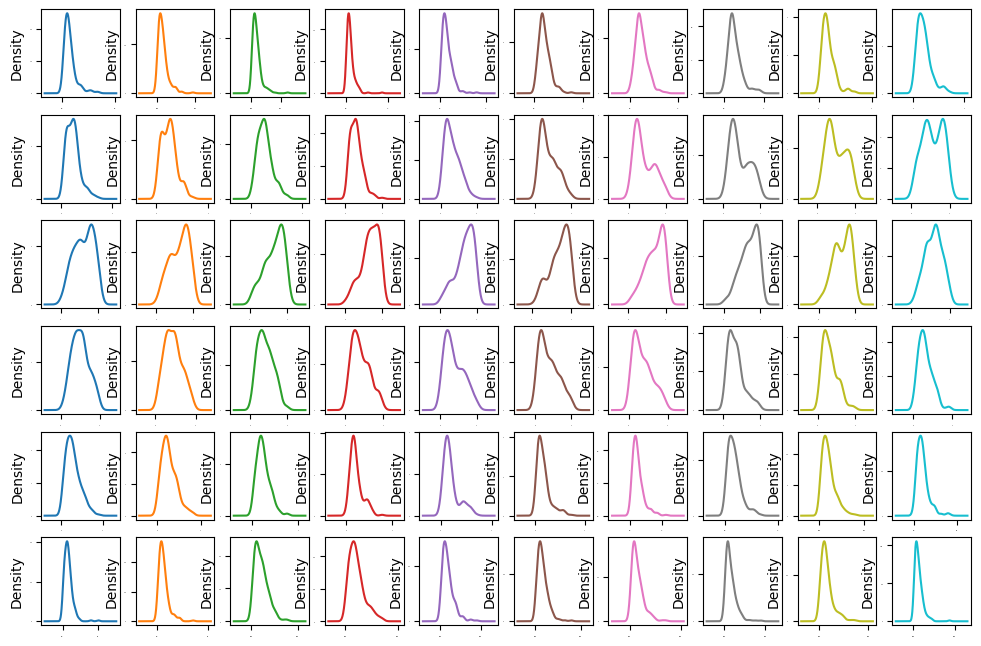

In [11]:
# Visualization of individual attributes using density
sonar_data.plot(kind='density', subplots=True, layout=(6,10), sharex=False, legend=False,
fontsize=1, figsize=(12, 8))
pyplot.show()

<ipython-input-12-101f654d54b8>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cax = ax.matshow(sonar_data.corr(), vmin=-1, vmax=1, interpolation='none')


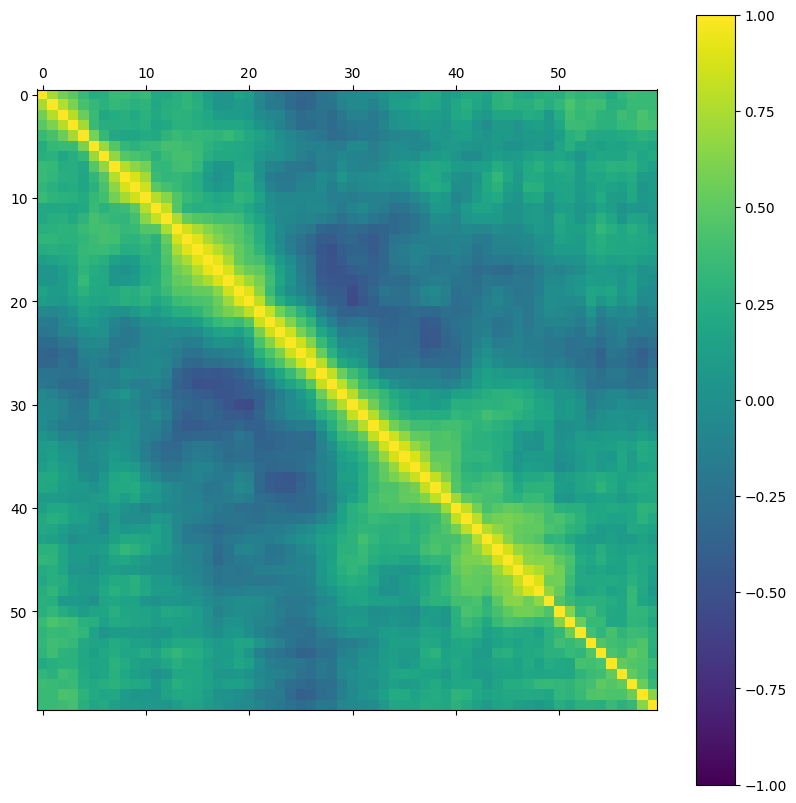

In [12]:
# correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(sonar_data.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
fig.set_size_inches(10, 10)
pyplot.show()

## Separating dependant variables from independent variables



In [13]:
# Data separation
X = sonar_data.drop(columns='Label', axis=1)
Y = sonar_data['Label']

In [14]:
print(X)

     Freq_1  Freq_2  Freq_3  Freq_4  Freq_5  Freq_6  Freq_7  Freq_8  Freq_9  \
0     0.020   0.037   0.043   0.021   0.095   0.099   0.154   0.160   0.311   
1     0.045   0.052   0.084   0.069   0.118   0.258   0.216   0.348   0.334   
2     0.026   0.058   0.110   0.108   0.097   0.228   0.243   0.377   0.560   
3     0.010   0.017   0.062   0.021   0.021   0.037   0.110   0.128   0.060   
4     0.076   0.067   0.048   0.039   0.059   0.065   0.121   0.247   0.356   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203   0.019   0.035   0.017   0.018   0.039   0.163   0.203   0.169   0.233   
204   0.032   0.010   0.030   0.056   0.076   0.096   0.099   0.102   0.103   
205   0.052   0.044   0.018   0.029   0.035   0.117   0.126   0.118   0.126   
206   0.030   0.035   0.049   0.061   0.017   0.135   0.146   0.112   0.195   
207   0.026   0.036   0.014   0.027   0.021   0.034   0.066   0.140   0.184   

     Freq_10  ...  Freq_51  Freq_52  Freq_53  Freq_

In [15]:
print(Y)

0      R
1      R
2      R
3      R
4      R
      ..
203    M
204    M
205    M
206    M
207    M
Name: Label, Length: 208, dtype: object


## Feature Selection

In [16]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

# X and Y are your feature matrix and target variable(Lables)
rf_model = RandomForestClassifier()
feature_selector = SelectFromModel(rf_model)
feature_selector.fit(X, Y)
selected_features = X.columns[feature_selector.get_support()]

In [17]:
# Printing out the selected features
print(selected_features)

Index(['Freq_4', 'Freq_5', 'Freq_9', 'Freq_10', 'Freq_11', 'Freq_12',
       'Freq_13', 'Freq_15', 'Freq_16', 'Freq_17', 'Freq_23', 'Freq_31',
       'Freq_36', 'Freq_37', 'Freq_43', 'Freq_45', 'Freq_46', 'Freq_47',
       'Freq_48', 'Freq_49', 'Freq_51', 'Freq_52'],
      dtype='object')


## Preprocessing (Feature Scaling)

In [18]:
# MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
X_scaled

array([[0.13643068, 0.15645092, 0.13567674, ..., 0.18535469, 0.24517906,
        0.06004619],
       [0.32300885, 0.22160309, 0.27201051, ..., 0.10526316, 0.14049587,
        0.08775982],
       [0.18215339, 0.24689241, 0.35611038, ..., 0.36842105, 0.25895317,
        0.16628176],
       ...,
       [0.37389381, 0.18474068, 0.05420499, ..., 0.30892449, 0.20936639,
        0.05773672],
       [0.21238938, 0.14873553, 0.15604468, ..., 0.17391304, 0.09641873,
        0.09699769],
       [0.18067847, 0.15302186, 0.03975033, ..., 0.07551487, 0.16528926,
        0.2517321 ]])

# **Data Splitting**

In [20]:
# Splitting Data into Train set & Test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify=Y, random_state=1)


In [21]:
X_test.shape

(21, 60)

In [22]:
Y_test.shape

(21,)

In [23]:
# Printing the splitted data
print(f"Original sonar_data shape: {X.shape},\n train data: {X_train.shape},\n test data: {X_test.shape}")

Original sonar_data shape: (208, 60),
 train data: (187, 60),
 test data: (21, 60)


# **Model Training**

In [24]:
# **Trianing models with train data to choose the accurate algorithm**

# 1. TRAINING LOGISTIC REGRESSION MODEL
lr_model = LogisticRegression()
lr_model.fit(X_train, Y_train)
# Predictions on the test set
Y_pred_lr = lr_model.predict(X_test)


# 2. TRAINING SUPPORT VECTOR MACHINE MODEL
svm_model = SVC(C=1.5, kernel='rbf')
svm_model.fit(X_train, Y_train)
# Predictions on the test set
Y_pred_svm = svm_model.predict(X_test)


# 3. TRAINING KNEAREST NEIGHBOR ALGORITHM
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, Y_train)
# Predictions on the test set
Y_pred_knn = knn_model.predict(X_test)


# **Model Evaluation**

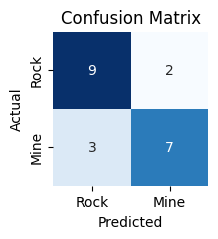

Accuracy: 0.7619047619047619
Classification Report:
               precision    recall  f1-score   support

           M       0.75      0.82      0.78        11
           R       0.78      0.70      0.74        10

    accuracy                           0.76        21
   macro avg       0.76      0.76      0.76        21
weighted avg       0.76      0.76      0.76        21



In [25]:
# LOGISTIC REGRESSION MDEL EVALUATION
lr_accuracy = accuracy_score(Y_test, Y_pred_lr)
lr_confusion_matrix = confusion_matrix(Y_test, Y_pred_lr)

# Create a confusion matrix
plt.figure(figsize=(2, 2))
sns.heatmap(lr_confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Rock', 'Mine'], yticklabels=['Rock', 'Mine'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# classification_report
lr_classification_report = classification_report(Y_test, Y_pred_lr)

print(f"Accuracy: {lr_accuracy}")
# print(f"Confusion Matrix:\n {lr_confusion_matrix}")
print("Classification Report:\n", lr_classification_report)

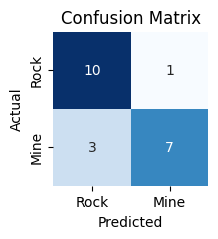

Accuracy: 0.8095238095238095
Classification Report:
               precision    recall  f1-score   support

           M       0.77      0.91      0.83        11
           R       0.88      0.70      0.78        10

    accuracy                           0.81        21
   macro avg       0.82      0.80      0.81        21
weighted avg       0.82      0.81      0.81        21



In [26]:
# SVM MODEL EVALUATION
svm_accuracy = accuracy_score(Y_test, Y_pred_svm)
svm_confusion_matrix = confusion_matrix(Y_test, Y_pred_svm)

# Create a confusion matrix
plt.figure(figsize=(2, 2))
sns.heatmap(svm_confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Rock', 'Mine'], yticklabels=['Rock', 'Mine'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# classification_report
svm_classification_report = classification_report(Y_test, Y_pred_svm)

print(f"Accuracy: {svm_accuracy}")
# print(f"Confusion Matrix:\n {svm_confusion_matrix}")
print("Classification Report:\n", svm_classification_report)

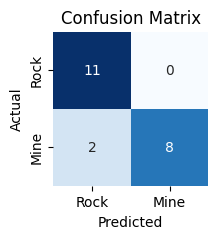

Accuracy: 0.9047619047619048
Confusion Matrix:
 [[11  0]
 [ 2  8]]
Classification Report:
               precision    recall  f1-score   support

           M       0.85      1.00      0.92        11
           R       1.00      0.80      0.89        10

    accuracy                           0.90        21
   macro avg       0.92      0.90      0.90        21
weighted avg       0.92      0.90      0.90        21



In [27]:
# KNEAREST NEIGHBOR MODEL EVALUATION
knn_accuracy = accuracy_score(Y_test, Y_pred_knn)

# Create a confusion matrix
knn_confusion_matrix = confusion_matrix(Y_test, Y_pred_knn)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(2, 2))
sns.heatmap(knn_confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Rock', 'Mine'], yticklabels=['Rock', 'Mine'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# classification_report
knn_classification_report = classification_report(Y_test, Y_pred_knn)

print(f"Accuracy: {knn_accuracy}")
print(f"Confusion Matrix:\n {knn_confusion_matrix}")
print("Classification Report:\n", knn_classification_report)

In [28]:
final_data  = pd.DataFrame({'Models': ['LR', 'SVM', 'KNN'],
                            'Accuracy': [lr_accuracy,
                                    svm_accuracy,
                                    knn_accuracy]})
final_data

,Models,Accuracy
0,LR,0.762
1,SVM,0.810
2,KNN,0.905


<Axes: xlabel='Models', ylabel='Accuracy'>

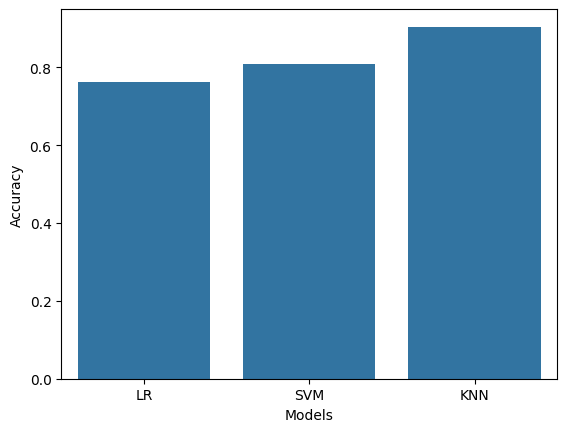

In [29]:
sns.barplot(x=final_data['Models'], y=final_data['Accuracy'])

# **Predictive System**

In [32]:
# k
# input_data = (0.2312,0.2195,0.3051,0.1937,0.157,0.0479,0.0538,0.0146,0.0068,0.0187,0.0059,0.0095,0.0194,0.008,0.0152,0.0158,0.0053,0.0189,0.0102,0.4797,0.5783,0.5071,0.4328,0.555,0.6711,0.6415,0.7104,0.808,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.051,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.018,0.0084,0.009,0.0032)
input_data = (0.0124,0.0433,0.0604,0.0449,0.0597,0.0355,0.0531,0.0343,0.1052,0.2120,0.1640,0.1901,0.3026,0.2019,0.0592,0.2390,0.3657,0.3809,0.5929,0.6299,0.5801,0.4574,0.4449,0.3691,0.6446,0.8940,0.8978,0.4980,0.3333,0.2350,0.1553,0.3666,0.4340,0.3082,0.3024,0.4109,0.5501,0.4129,0.5499,0.5018,0.3132,0.2802,0.2351,0.2298,0.1155,0.0724,0.0621,0.0318,0.0450,0.0167,0.0078,0.0083,0.0057,0.0174,0.0188,0.0054,0.0114,0.0196,0.0147,0.0062)

# e
# input_data = (0.0197,0.0394,0.0384,0.0076,0.0251,0.0629,0.0747,0.0578,0.1357,0.1695,0.1734,0.247,0.3141,0.3297,0.2759,0.2056,0.1162,0.1884,0.339,0.3926,0.4282,0.5418,0.6448,0.7223,0.7853,0.7984,0.8847,0.9582,0.899,0.6831,0.6108,0.548,0.5058,0.4476,0.2401,0.1405,0.1772,0.1742,0.3326,0.4021,0.3009,0.2075,0.1206,0.0255,0.0298,0.0691,0.0781,0.0777,0.0369,0.0057,0.0091,0.0134,0.0097,0.0042,0.0058,0.0072,0.0041,0.0045,0.0047,0.0054)
# input_data = (0.1083,0.1070,0.0257,0.0837,0.0748,0.1125,0.8718,0.7992,0.3712,0.1703,0.1611,0.2086,0.2847,0.2211,0.6134,0.5807,0.6925,0.3825,0.4303,0.7791,0.8703,1.0000,0.9212,0.9386,0.9303,0.7314,0.4791,0.2087,0.2016,0.1669,0.2872,0.4374,0.3097,0.1578,0.0553,0.0334,0.0209,0.0172,0.0180,0.0110,0.0234,0.0276,0.0032,0.0084,0.0122,0.0082,0.0143)

# Changing the input data to a numpy array

input_data_as_numpy_array = np.asarray(input_data)
# Reshaping the np array as we are predicting for one instance
input_data_reshape = input_data_as_numpy_array.reshape(1, -1)
# Predicting the reshaped data
prediction = knn_model.predict(input_data_reshape)
print(prediction)

if (prediction[0]== 'R'):
  print('The object is a ROCK.')
else:
  print('The object is a Mine.')


['R']
The object is a ROCK.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
